In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
file_path = Path("visa.csv")
df = pd.read_csv(file_path)

In [4]:
df.reset_index(inplace=True, drop=True)
df.head()

,Unnamed: 0,case_number,case_received_year,case_status,class_of_admission,decision_year,employer_country,employer_name,employer_num_employees,employer_state,...,job_info_experience,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_title,job_info_training,pw_amount_9089,pw_job_title_9089,pw_level_9089,pw_source_name_9089,pw_unit_of_pay_9089
0,135269,A-13316-14231,2013,Certified,H-1B,1432857600000000000,UNITED STATES OF AMERICA,GENERAC POWER SYSTEMS,1935,WI,...,N,Y,N,Senior Engineer,N,83366.0,Industrial Engineers,Level IV,OES,Year
1,135270,A-13316-14287,2013,Denied,H-1B,1435276800000000000,UNITED STATES OF AMERICA,"AMERICA'S CATCH, INC.",350,MS,...,N,N,N,Catfish Processor,N,16973.0,"Meat, Poultry, and Fish Cutters and Trimmers",Level I,OES,Year
2,135271,A-13316-14312,2013,Denied,H-1B,1413417600000000000,UNITED STATES OF AMERICA,"AVIDITY, LLC",4,CO,...,Y,Y,N,Protein Production Scientist,N,49982.0,Protein Production Scientist,Level I,OES,Year
3,135272,A-13316-14276,2013,Certified,E-2,1432598400000000000,UNITED STATES OF AMERICA,STAR COMMUNICATIONS LLC,8,WA,...,N,Y,N,Market Research Analyst,N,43514.0,Market Research Analysts and Marketing Special...,Level I,OES,Year
4,135273,A-13316-14275,2013,Denied,H-1B,1435276800000000000,UNITED STATES OF AMERICA,"AMERICA'S CATCH, INC.",350,MS,...,N,N,N,Catfish Processor,N,16973.0,"Meat, Poultry, and Fish Cutters and Trimmers",Level I,OES,Year


In [5]:
y = df["case_status"]
X = df.drop(columns="case_status")

In [6]:
X.describe()

,Unnamed: 0,employer_num_employees,fw_info_rel_occup_exp,fw_info_req_experience,job_info_alt_occ_num_months,job_info_education,job_info_experience,job_info_foreign_ed,job_info_foreign_lang_req,job_info_training,pw_level_9089,pw_amount_9089
count,229320.000000,2.293200e+05,229320.000000,229320.000000,229320.000000,229320.000000,229320.000000,229320.000000,229320.000000,229320.000000,229320.000000,2.293200e+05
mean,255077.789290,2.234857e+04,1.526352,0.557697,45.420513,4.006354,0.561752,0.901788,0.019296,0.018542,1.521533,9.004600e+04
std,69250.860935,8.348840e+04,0.840335,0.803124,21.648532,1.541139,0.496173,0.297602,0.137564,0.134900,1.061917,8.395543e+05
min,135269.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+00
25%,194473.750000,7.500000e+01,2.000000,0.000000,24.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.695500e+04
50%,255568.500000,1.250000e+03,2.000000,0.000000,60.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,8.661100e+04
75%,315070.250000,1.800000e+04,2.000000,1.000000,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.057060e+05
max,374353.000000,1.633332e+07,2.000000,2.000000,240.000000,6.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.125340e+08


In [7]:
# Check the balance of our target values
y.value_counts()

1    216539
0     12781
Name: case_status, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1, stratify=y)

X_train.shape

(171990, 12)

In [9]:
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_res, y_res = ros.fit_resample(X_train, y_train)
Counter(y_res)

Counter({1: 162404, 0: 162404})

In [10]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(random_state=1)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [11]:
#from random_forest.fit(X_train,y_train.ravel())
#y_pred.summary()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = logreg.predict(X_test)
print('log: ', metrics.accuracy_score(y_test, y_pred))

log:  0.9442700156985872


In [13]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.5

In [14]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[    0,  3195],
       [    0, 54135]])

In [15]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00      3195
          1       0.94      1.00      0.00      0.97      0.00      0.00     54135

avg / total       0.89      0.94      0.06      0.92      0.00      0.00     57330



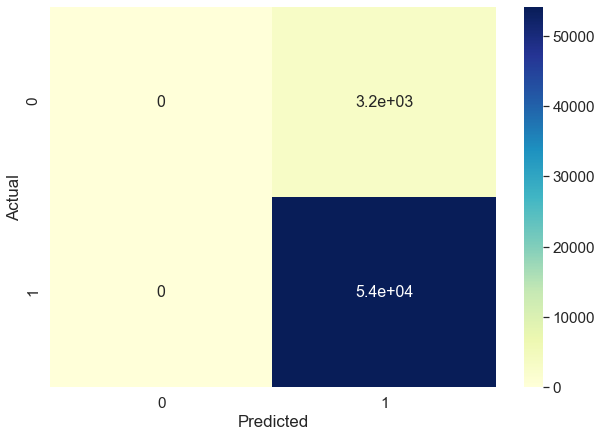

In [16]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size

### SMOTE Oversampling

In [17]:
# Resample the training data with SMOTE
X_res, y_res = SMOTE(random_state=1).fit_resample(X_train, y_train)
Counter(y_res)

Counter({1: 162404, 0: 162404})

In [18]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(random_state=1)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [19]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.5005890334154182

In [20]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[    4,  3191],
       [    4, 54131]])

In [21]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.00      1.00      0.00      0.04      0.00      3195
          1       0.94      1.00      0.00      0.97      0.04      0.00     54135

avg / total       0.92      0.94      0.06      0.92      0.04      0.00     57330



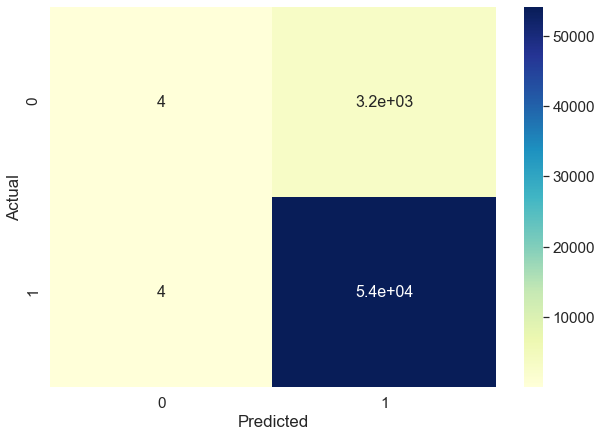

In [22]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size

## Ensemble Learners
### Balanced Random Forest Classifier

In [23]:
# Resample the training data with the BalancedRandomForestClassifier
random_forest_model = BalancedRandomForestClassifier(random_state=1)
random_forest_model = random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [24]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.7971289824473766

In [25]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 2571,   624],
       [11392, 42743]])

In [26]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.18      0.80      0.79      0.30      0.80      0.64      3195
          1       0.99      0.79      0.80      0.88      0.80      0.63     54135

avg / total       0.94      0.79      0.80      0.84      0.80      0.63     57330



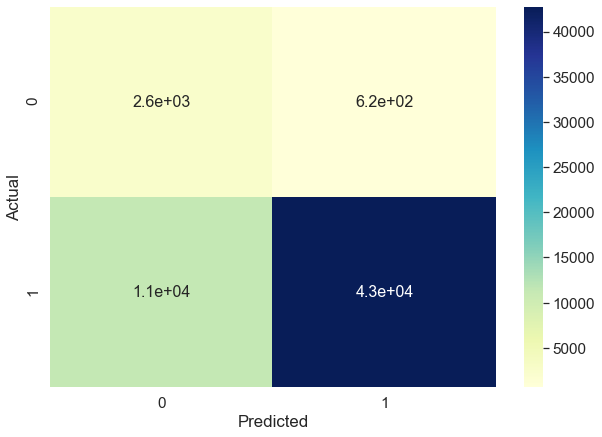

In [27]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size

### Easy Ensemble AdaBoost Classifier

In [28]:
# Train the EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)

In [29]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.7563738020623975

In [30]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 2368,   827],
       [12365, 41770]])

In [31]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.16      0.74      0.77      0.26      0.76      0.57      3195
          1       0.98      0.77      0.74      0.86      0.76      0.57     54135

avg / total       0.93      0.77      0.74      0.83      0.76      0.57     57330



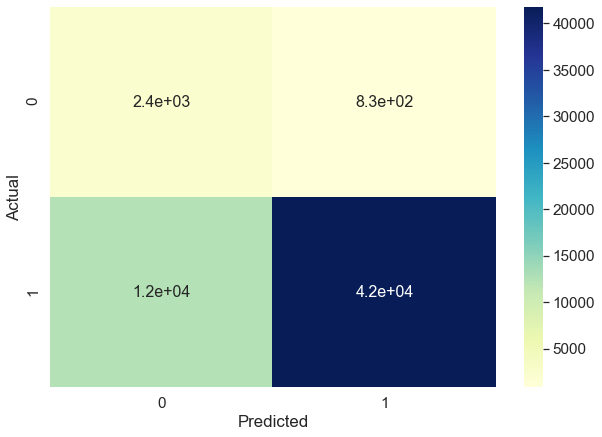

In [32]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size

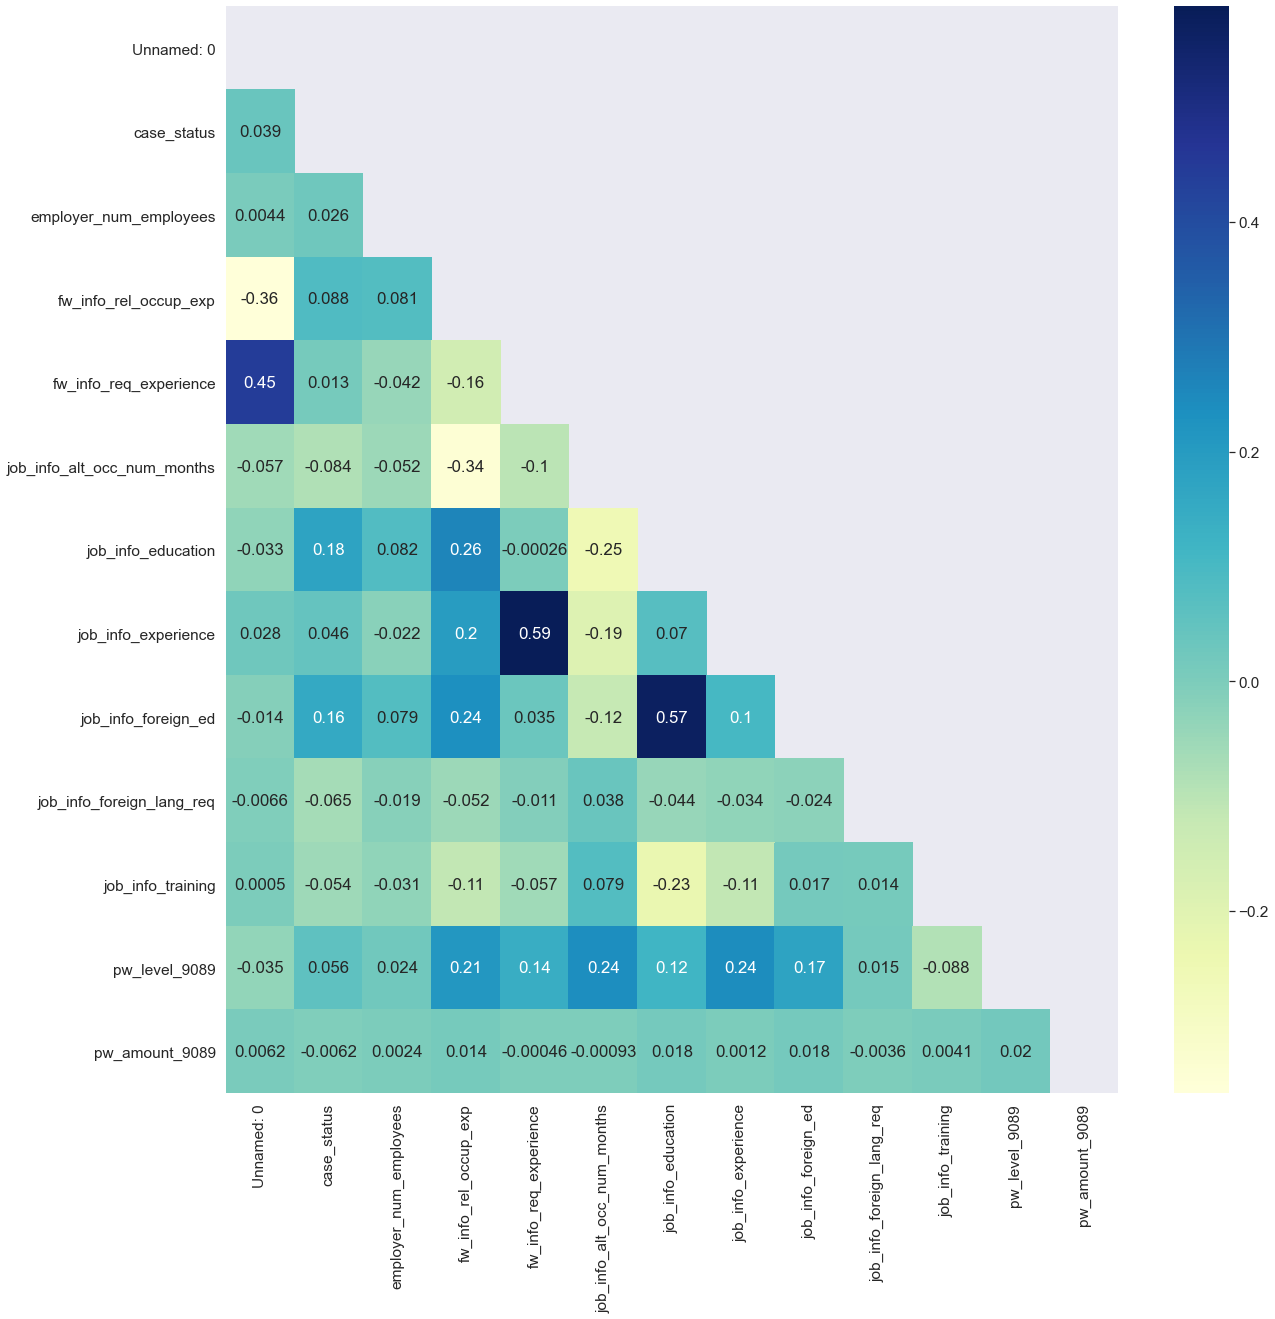

In [37]:
fig, ax = plt.subplots(figsize=(20,20)) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap="YlGnBu")